# Introduction to Data Science
## Homework 3 

Student Name: 
Student Netid: ***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv("cell2cell_data.csv")
df.columns = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churnedp']

#Splitting the data frame in to test and train data
msk = np.random.choice(len(df),int(len(df)*0.8),replace=False)
train_df = df.loc[msk]
test_df = df.drop(msk)

print(df)
print(len(train_df))
print(len(test_df))

       revenue  outcalls  incalls  months  eqpdays  webcap  marryyes  travel  \
0        83.53     20.00     1.00      31      745       1         0       0   
1        29.99      0.00     0.00      52     1441       0         0       0   
2        51.42      0.00     0.00      36       59       1         0       0   
3        37.75      2.67     0.00      25      572       0         0       0   
4         5.00      0.00     0.00      26      785       1         0       0   
5         5.25      0.00     0.00      45     1354       0         0       0   
6        26.84      4.00     1.33      49     1471       0         1       0   
7        42.71      8.67     0.00      27      224       1         0       0   
8        53.69     15.00     2.33      23      267       1         0       0   
9        33.66      8.33     0.00      31      933       1         0       0   
10       52.56     80.00    31.67      33      402       1         0       0   
11       22.50      8.67     2.67      3

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
If we have to prove that the data was indeed randomly sampled on X : The best way is to compare the rate of churn in the training dataframe to the rate of churn in complete dataset. This will prove that the trainig data has been sampled randomly. Same can be applied to test data frame as well, there also rate of churn in test dataframe should be similar to rate of churn in complete dataset.
    </span>
    </p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(train_df.drop('churnedp',1),train_df.churnedp)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

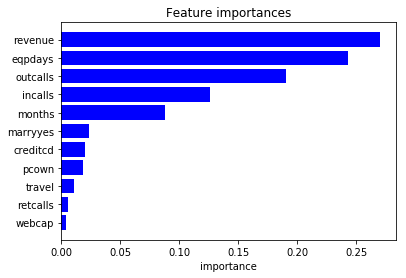

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
features = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']
importances = model.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('importance')
plt.title('Feature importances')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

<p>
<span style="color:blue">
The three most important feature are : revenue, eqpdays, outcalls.

Taking correlation between the three features
</span>
</p>

In [93]:
print(df['revenue'].corr(df['eqpdays']))
print(df['revenue'].corr(df['outcalls']))
print(df['eqpdays'].corr(df['outcalls']))

-0.2219561230652968
0.5008694472531494
-0.2439905425006991


<p>
<span style="color:blue">
Real life connection between each variable and churn :
1. Revenue and eqpdays are negatively correlated which could mean that as number of days the customer has had his/her current equipment increases (i.e as equipment gets old), the mean monthly revenue decreases.
2. Revenue and outcalls are positvely correlated.
3. outcalls and eqpdays are negatively correlated which means that as number of days the customer has had his/her current equipment increases mean number of outbound calls decreases.
    
Effect on churn of these three features would be :
Customers who have their current equipment for a longer period of time are more likely to churn.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [4]:
from sklearn import metrics
pred_train = model.predict(train_df.drop('churnedp',1))
print('Accuracy of Decision Tree classifier on train set ' + str(metrics.accuracy_score(pred_train,train_df.churnedp)))

pred_test = model.predict(test_df.drop('churnedp',1))
print('Accuracy of Decision Tree classifier on test set ' + str(metrics.accuracy_score(pred_test,test_df.churnedp)))

Accuracy of Decision Tree classifier on train set 0.9998431913692529
Accuracy of Decision Tree classifier on test set 0.5326141495233316


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [5]:
min_samples_split =  list(range(300,1300,100))
print (min_samples_split)
min_samples_leaf = list(range(100,600,50))
print(min_samples_leaf)

[300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
[100, 150, 200, 250, 300, 350, 400, 450, 500, 550]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
minimum sample split : When we increase this parameter, tree becomes more constrained as it has to consider more samples at each node. I have considered 10 values which roughly varies around 1 to 4 percent of training data.
minimum sample leaf : This parameter describes minimum number of samples at the leaf, at the base of tree. I have considered 10 values which roughly varies around 0.5 to 2 percent of training data.
Keeping these values too low may lead to overfitting and if we keep these values too high, it may lead to underfitting.
    </span>
    </p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_leaf` as the x-axis and generate a new series (line) for each of `min_samples_split`.

(5 Points)

Text(0.5,1,'Accuracy')

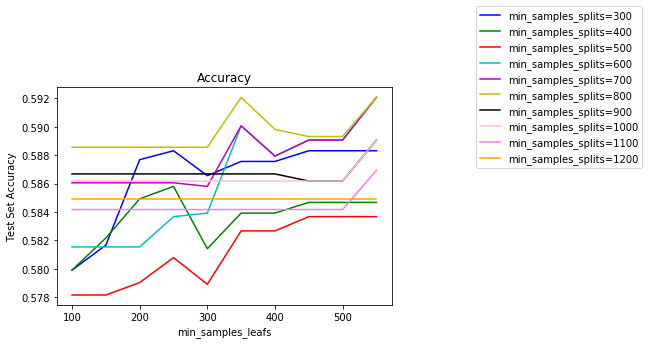

In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

min_samples_splits = min_samples_split
min_sample_leaves = min_samples_leaf
dct = dict()
accuracy_result = []

def tuneModel (min_leaves , min_split , x_train , y_train , x_test, y_test):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=min_leaves,min_samples_split=min_split)
    clf = clf.fit(x_train,y_train)
    test_predict = clf.predict(x_test)
    pred_test = clf.predict(x_test)
    accuracy = metrics.accuracy_score(pred_test,y_test)
    accuracy_result.append((accuracy,min_leaves,min_split))
    dct[l].append(accuracy)
    
    
for l in min_sample_leaves:
    dct[l] = list()
    
for l in min_sample_leaves:
    for s in min_samples_splits:
        result = tuneModel(l,s,train_df.drop('churnedp',1),train_df.churnedp,test_df.drop('churnedp',1),test_df.churnedp)
  
fig = plt.figure()
ax=fig.add_subplot(111)
b=np.arange(0,10)
colors=['b','g','r','c','m','y','k','pink','violet','orange']
for l,i in zip(b,range(len(colors))):
    plt.plot(min_sample_leaves,dct[min_sample_leaves[i]], colors[l], label = 'min_samples_splits={}'.format(min_samples_splits[i]))
plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
ax.set_xlabel('min_samples_leafs')
ax.set_ylabel('Test Set Accuracy')
plt.title('Accuracy')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
The configuration that returns the best accuracy is :
    </span>
    </p>

In [107]:
print(max(accuracy_result))

(0.5973406924234822, 200, 1200)


<p>
<span style="color:blue">
    Maximum Accuracy is : 0.5973406924234822, which we get at sample split of 1200 and leaf split of 200.
    </span></p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
    
By using this model, churn prediction can be increased. We can identify the top features or factors responsible for churn. Thus, company can focus on people who are more likely to churn and can take counter measures for it such as campaign etc.

The top driver for churn is revenue, the higher the one's monthly revenue,less likely he/she would churn. This analysis would help the company to focus their business with people who have higher income. 

The second top driver is eqpdays i.e the number of days one has his/her current equipment. The relation between churn and eqpdays id positive, we can say the longer the customer has the product, more likely one would churn. There can be certain reasons for this, some other competitors provide better services or customers are not satisfied with the current services of company.
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [8]:
from scipy import stats
import statsmodels.api as sm

time_series_data = pd.read_csv("cases.csv")
time_series_data.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del time_series_data["YEAR"]

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

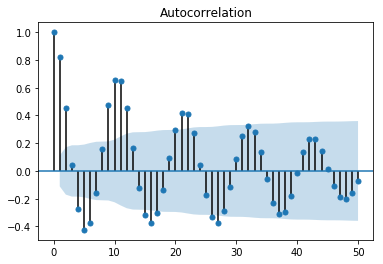

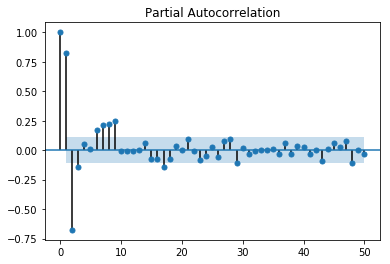

In [9]:
from pandas import Series
from matplotlib import pyplot
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(time_series_data , lags=50)
pyplot.show()


plot_pacf(time_series_data, lags=50)
pyplot.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
Answer : The given model follows Rule 2, because for ACF shows a sine-wave shape pattern and the PACF has spikes at lags1 and 2, and no correlation is there for other lags. Therefore, autoregressive parameter p is 2 and moving average parameter is 0. (i.e p = 2 and q = 0)
    </span>
    </p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [10]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(time_series_data.YFCASES))

0.13952892659903304


5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


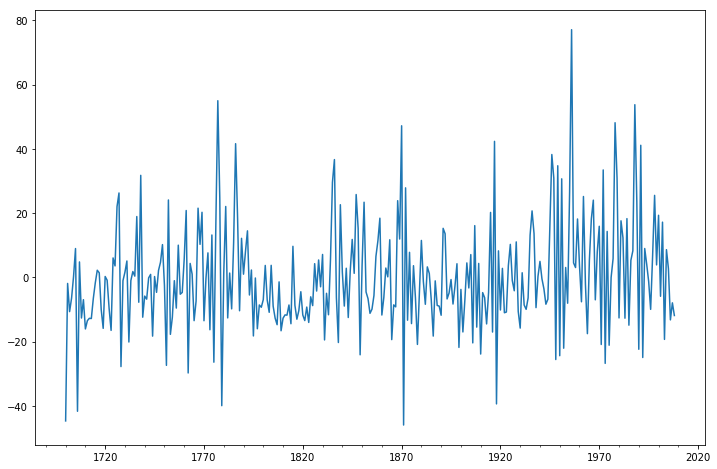

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

arma_model20 = sm.tsa.ARMA(time_series_data, (2,0)).fit()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_model20.resid.plot(ax=ax)

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



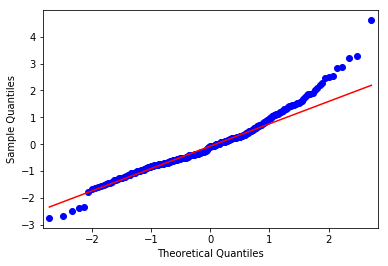

In [13]:
from statsmodels.graphics.api import qqplot

residual20 = arma_model20.resid
stats.normaltest(residual20)

fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(residual20, line='q', ax=ax, fit=True)


<p>
<span style="color:blue">
The results of hypothesis test and qq-plot perfectly aligns from the range of -2 to 1.qq-plot deviates from the line in the remaining range.
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


            AC          Q  Prob(>Q)
lag                                
1.0  -0.085220   2.265963  0.132244
2.0   0.103691   5.631595  0.059857
3.0  -0.027833   5.874879  0.117859
4.0   0.091122   8.491075  0.075158
5.0   0.019010   8.605309  0.125881
6.0   0.031321   8.916433  0.178333
7.0   0.044485   9.546129  0.215785
8.0  -0.034337   9.922561  0.270503
9.0   0.185690  20.967736  0.012794
10.0  0.191608  32.767496  0.000298
11.0  0.190385  44.456241  0.000006
12.0  0.121693  49.247974  0.000002
13.0 -0.016219  49.333376  0.000004
14.0  0.014986  49.406538  0.000008
15.0 -0.063197  50.711986  0.000009
16.0  0.039730  51.229699  0.000015
17.0  0.009577  51.259882  0.000027
18.0 -0.073645  53.050943  0.000026
19.0  0.076469  54.988676  0.000023
20.0 -0.006827  55.004174  0.000041
21.0  0.088818  57.636439  0.000029
22.0  0.120485  62.497151  0.000009
23.0  0.103328  66.084660  0.000005
24.0 -0.085728  68.562776  0.000004
25.0  0.013730  68.626565  0.000006
26.0 -0.036183  69.071136  0

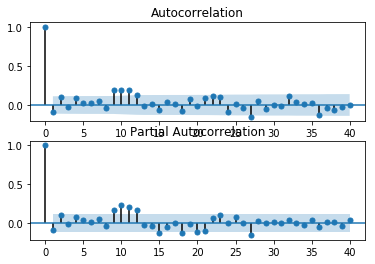

In [14]:
%matplotlib inline
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residual20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual20, lags=40, ax=ax2)

r,q,p = sm.tsa.acf(residual20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

<p>
<span style="color:blue">
p-values for the Ljung–Box Q test all are well above .05 for lags 1 through 8, indicating “significance.” This kind of result is not desirable. However, the p-values for the remaining lags through 40 data values as less than .05. So, not very much data contribute at higher lags.
</span>
</p>

8\. Compute prediction for years 2005-2008 and analyze their fit against actual values. (1 point)



/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2004-12-31    31.767653
2005-12-31    15.110171
2006-12-31    13.933041
2007-12-31    23.765921
2008-12-31    38.250610
Freq: A-DEC, dtype: float64


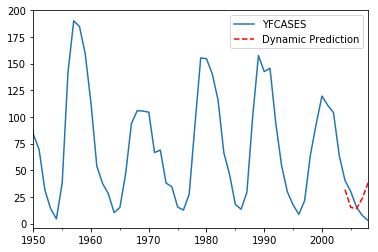

In [15]:
predict_2005_2008 = arma_model20.predict('2004', '2008', dynamic=True)
ax = time_series_data.plot()
ax = predict_2005_2008.plot(ax = ax ,style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
print(predict_2005_2008)

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [16]:
# Using the predictions for years 1190 to 2008.
predictions = arma_model20.predict('1990', '2008', dynamic = "True")

def mean_forecast_error(d, pred):
    return d.sub(pred).mean()

def mean_absolute_error(d, pred):
    return np.mean((np.abs(d.sub(pred).mean()) / pred))

MFE =  mean_forecast_error(time_series_data.YFCASES, predictions)
MAE = mean_absolute_error(time_series_data.YFCASES, predictions)

print ("MFE = ", MFE)
print ("MAE = ", MAE)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


MFE =  4.730437376819153
MAE =  0.14343808280915932
